# Vision Through Voice: Transforming Lives with GPT-4V(ision) for the Visually Impaired
This notebook aims to provide the code to create descriptions using GPT-4 using textual and visual data as inputs.

After that, we transform the answer from GPT-4 into an audio file using TTS API from OpenAI and attach it to the original video.

Here, we propose a use case where we try to simulate an environment where a blind person is guided by GPT-4.

### Libraries

In [4]:
import os
import utils
from IPython.display import Audio
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from dotenv import load_dotenv

load_dotenv()


True

### Preprocess video
1. Cut video in the seconds of interest
2. Convert it into base64
3. Render final video

INFO:root:1081, frames read.


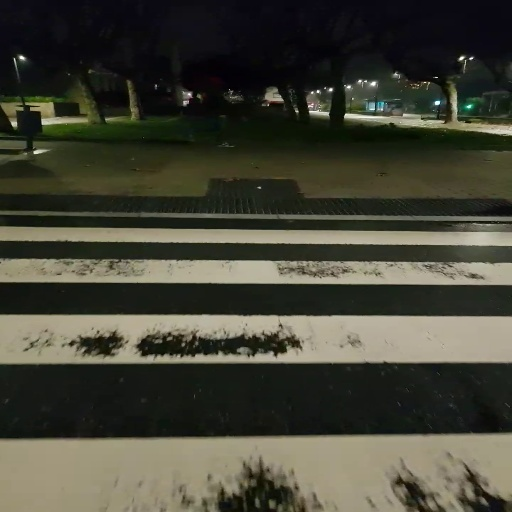

In [2]:
# cut video from 29 to 65
ffmpeg_extract_subclip("data/all_video.mp4", 29, 65, targetname="data/video.mp4")

# create list with base 64 resized frames (512, 512) to avoid exceeding OpenAI token limit
base64Frames = utils.convert_frames_to_base64("data/video.mp4", (512, 512))

# watch final video
utils.render_video(base64Frames)

### Send video and prompt to GPT-4V(ision) using OpenAI API

In [4]:
description = utils.get_description(
    prompt="These are frames from a person walking. Narrate succinctly with short sentences like they do in GPS devices the elements and obstacles around you to help a blind person go through.",
    frame_list=base64Frames,
    frame_interval=100,
    open_ai_key=os.getenv("OPENAI_API_KEY"),
    max_tokens=350
)

INFO:root:Walk straight on a textured pathway, keep the building to your right.
Continue forward with slight curve to the right.
Stay straight, small overhang ahead on your right.
Proceed, passing the overhang, continue on flat path.
Straight ahead, approaching a well-lit area.
After well-lit area, transition onto patterned pavement.
Follow the tiled pavement with guiding lines straight ahead.
Continue under the passageway, keeping the pillars parallel to you.
Move through passageway, slight descent ahead.
Pathway ends, prepare to stop at pedestrian crossing.
Stand at crosswalk, wait for audible signal to cross the street.


### Create audio based on the GPT-4V(ision) output

In [7]:
audio = utils.transform_text_to_speech(
    description=description,
    open_ai_key=os.getenv("OPENAI_API_KEY"),
    model="tts-1",
    voice="fable",
    save_path="audio.mp3"
)

# render audio
Audio(audio)

### Join together audio and video and save final clip

In [ ]:
utils.attach_audio_to_video("data/audio.mp3", "data/video.mp4", "data/video_audio.mp4")